In [35]:
# get all the imports

# all the imports 
import warnings

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# HTTP requests and web scraping
import requests
from bs4 import BeautifulSoup
from io import StringIO

import urllib.parse

import os
from glob import glob

from scipy import stats

print("All imports work! Your environment is ready for data analysis and web scraping.")


All imports work! Your environment is ready for data analysis and web scraping.


In [36]:
#formatting for data set

pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None

pd.set_option("display.max_colwidth", None)

+++ Main Data Set ++++


In [37]:
## pull the data set - Immaculate Data Version 

fifa_data = "https://raw.githubusercontent.com/fern-1210/IronHack-w3-Modual1-Project3/main/Data/Clean/The%20Immaculate%20Data.csv"
fifa = pd.read_csv(fifa_data)


# Create a copy to avoid modifying the original
fifa = fifa.copy()

# List of value columns to convert
value_columns = ['2019 Value', '2020 Value', '2021 Value', '2022 Value', '2023 Value']

# Convert each column from euros to millions
for col in value_columns:
    fifa[col] = fifa[col] / 1000000


fifa.head()

,ID,Name,Nationality,Overall,Wage,Preferred Foot,Work Rate,Body Type,Position,Height,Weight,Year,in_2019,in_2020,in_2021,in_2022,in_2023,Age in 2019,Age in 2023,2019 Club,2020 Club,2021 Club,2022 Club,2023 Club,2019 Value,2020 Value,2021 Value,2022 Value,2023 Value,Total Clubs 2019-2023
0,176580,L. Suárez,Uruguay,84,1000,Right,High/ Medium,Unique,Left Striker,182,86,2023,1,1,1,1,1,31,35,FC Barcelona,FC Barcelona,Atlético Madrid,Atlético de Madrid,Club Nacional de Football,80.00,53.00,31.50,44.50,18.00,4
1,194765,A. Griezmann,France,83,185000,Left,Medium/ Medium,Unique,Right Striker,176,73,2023,1,1,1,1,1,27,31,Atlético Madrid,FC Barcelona,FC Barcelona,Atlético de Madrid,Atlético de Madrid,71.00,69.00,50.50,53.00,30.50,3
2,177003,L. Modrić,Croatia,88,230000,Right,Medium/ Medium,Lean (170-185),Right Centre Midfield,172,66,2023,1,1,1,1,1,32,36,Real Madrid,Real Madrid,Real Madrid,Real Madrid CF,Real Madrid CF,67.00,39.00,24.50,32.00,29.00,2
3,224334,M. Acuña,Argentina,85,46000,Left,High/ High,Stocky (170-185),Left Back,172,69,2023,1,1,1,1,1,26,30,Sporting CP,Sporting CP,Sevilla FC,Sevilla FC,Sevilla FC,19.00,20.00,22.00,37.00,46.50,2
4,192985,K. De Bruyne,Belgium,91,350000,Right,High/ High,Unique,Right Centre Midfield,181,70,2023,1,1,1,1,1,27,31,Manchester City,Manchester City,Manchester City,Manchester City,Manchester City,93.00,90.00,87.00,125.50,107.50,1


+++ Begin Analysis +++

In [39]:
# Focusing on the main data points for the analysis under DF ["fifa_foot_analysis"]
fifa_foot_analysis = fifa[[
    "ID",
    "Name", 
    "Preferred Foot",
    "Position",
    "Overall",
    "2019 Value",
    "2020 Value",
    "2021 Value",
    "2022 Value",
    "2023 Value"
]].copy()

# View on the data set
display(fifa_foot_analysis.head(10))

# Check the distribution of foot preference
display("\nPreferred Foot distribution: %")
display(fifa_foot_analysis["Preferred Foot"].value_counts(normalize=True))

# Check the distribution of foot preference
display("\nPreferred Foot distribution: absolute")
display(fifa_foot_analysis["Preferred Foot"].value_counts())


##### Look at the Aggregate view on Key Metrics 

#Analysis Code


# Group by Preferred Foot and calculate statistics
foot_stats = fifa_foot_analysis.groupby("Preferred Foot").agg({
                                                            "Overall": ["mean", "median", "std", "min", "max"],
                                                            "2019 Value": ["mean", "median"],
                                                            "2020 Value": ["mean", "median"],
                                                            "2021 Value": ["mean", "median"],
                                                            "2022 Value": ["mean", "median"],
                                                            "2023 Value": ["mean", "median"]
})

print("="*80)
print("SUMMARY STATISTICS BY PREFERRED FOOT")
print("="*80)
display(foot_stats)

# Calculate average market value across all years
fifa_foot_analysis["Avg_Value_2019_2023"] = fifa_foot_analysis[[
                                                "2019 Value", "2020 Value", "2021 Value", "2022 Value", "2023 Value"
]].mean(axis=1)

# Simple comparison
print("\n" + "="*80)
print("SIMPLE COMPARISON - look at MEAN")
print("="*80)

left_foot = fifa_foot_analysis[fifa_foot_analysis["Preferred Foot"] == "Left"]
right_foot = fifa_foot_analysis[fifa_foot_analysis["Preferred Foot"] == "Right"]

print(f"\nLeft-Footed Players (n={len(left_foot)}):")
print(f"  Mean Overall: {left_foot['Overall'].mean():.2f}")
print(f"  Mean Avg Value: €{left_foot['Avg_Value_2019_2023'].mean():.2f}M")

print(f"\nRight-Footed Players (n={len(right_foot)}):")
print(f"  Mean Overall: {right_foot['Overall'].mean():.2f}")
print(f"  Mean Avg Value: €{right_foot['Avg_Value_2019_2023'].mean():.2f}M")

print(f"\nDifference:")
print(f"  Overall: {left_foot['Overall'].mean() - right_foot['Overall'].mean():.2f} points")
print(f"  Avg Value: €{left_foot['Avg_Value_2019_2023'].mean() - right_foot['Avg_Value_2019_2023'].mean():.2f}M")



# Simple comparison - look at median
print("\n" + "="*80)
print("SIMPLE COMPARISON - look at MEDIAN")
print("="*80)

left_foot = fifa_foot_analysis[fifa_foot_analysis["Preferred Foot"] == "Left"]
right_foot = fifa_foot_analysis[fifa_foot_analysis["Preferred Foot"] == "Right"]

print(f"\nLeft-Footed Players (n={len(left_foot)}):")
print(f"  Median Overall: {left_foot['Overall'].median():.2f}")
print(f"  Median Avg Value: €{left_foot['Avg_Value_2019_2023'].median():.2f}M")

print(f"\nRight-Footed Players (n={len(right_foot)}):")
print(f"  Median Overall: {right_foot['Overall'].median():.2f}")
print(f"  Median Avg Value: €{right_foot['Avg_Value_2019_2023'].median():.2f}M")

print(f"\nDifference:")
print(f"  Overall: {left_foot['Overall'].median() - right_foot['Overall'].median():.2f} points")
print(f"  Avg Value: €{left_foot['Avg_Value_2019_2023'].median() - right_foot['Avg_Value_2019_2023'].median():.2f}M")


,ID,Name,Preferred Foot,Position,Overall,2019 Value,2020 Value,2021 Value,2022 Value,2023 Value
0,176580,L. Suárez,Right,Left Striker,84,80.00,53.00,31.50,44.50,18.00
1,194765,A. Griezmann,Left,Right Striker,83,71.00,69.00,50.50,53.00,30.50
2,177003,L. Modrić,Right,Right Centre Midfield,88,67.00,39.00,24.50,32.00,29.00
3,224334,M. Acuña,Left,Left Back,85,19.00,20.00,22.00,37.00,46.50
4,192985,K. De Bruyne,Right,Right Centre Midfield,91,93.00,90.00,87.00,125.50,107.50
5,178518,R. Nainggolan,Right,Right Centre Midfield,76,35.50,27.50,20.00,13.00,3.50
6,212198,B. Fernandes,Right,Left Centre Midfield,86,50.00,56.50,63.00,107.50,78.50
7,176676,M. arcelo,Left,Substitute,79,32.00,22.50,16.00,11.00,9.00
8,212462,A. Telles,Left,Substitute,80,31.00,31.50,31.00,27.50,18.50
9,173731,G. Bale,Left,Right Striker,81,45.00,37.50,24.50,25.00,20.50


'\nPreferred Foot distribution: %'

Preferred Foot
Right   0.75
Left    0.25
Name: proportion, dtype: float64

'\nPreferred Foot distribution: absolute'

Preferred Foot
Right    2767
Left      917
Name: count, dtype: int64

SUMMARY STATISTICS BY PREFERRED FOOT


Overall                     2019 Value        2020 Value  \
                  mean median  std min max       mean median       mean   
Preferred Foot                                                            
Left             73.08  73.00 5.70  58  91       7.09   3.20       7.49   
Right            73.13  73.00 5.65  49  91       7.01   3.30       7.47   

                      2021 Value        2022 Value        2023 Value         
               median       mean median       mean median       mean median  
Preferred Foot                                                               
Left             4.10       7.11   3.80       9.53   3.70       9.16   3.50  
Right            3.90       6.83   3.60       9.16   3.50       8.72   3.20


SIMPLE COMPARISON - look at MEAN

Left-Footed Players (n=917):
  Mean Overall: 73.08
  Mean Avg Value: €8.07M

Right-Footed Players (n=2767):
  Mean Overall: 73.13
  Mean Avg Value: €7.84M

Difference:
  Overall: -0.04 points
  Avg Value: €0.24M

SIMPLE COMPARISON - look at MEDIAN

Left-Footed Players (n=917):
  Median Overall: 73.00
  Median Avg Value: €4.10M

Right-Footed Players (n=2767):
  Median Overall: 73.00
  Median Avg Value: €3.92M

Difference:
  Overall: 0.00 points
  Avg Value: €0.18M


SUMMARY STATISTICS BY PREFERRED FOOT


Overall                     2019 Value        2020 Value  \
                  mean median  std min max       mean median       mean   
Preferred Foot                                                            
Left             73.08  73.00 5.70  58  91       7.09   3.20       7.49   
Right            73.13  73.00 5.65  49  91       7.01   3.30       7.47   

                      2021 Value        2022 Value        2023 Value         
               median       mean median       mean median       mean median  
Preferred Foot                                                               
Left             4.10       7.11   3.80       9.53   3.70       9.16   3.50  
Right            3.90       6.83   3.60       9.16   3.50       8.72   3.20


SIMPLE COMPARISON - look at MEAN

Left-Footed Players (n=917):
  Mean Overall: 73.08
  Mean Avg Value: €8.07M

Right-Footed Players (n=2767):
  Mean Overall: 73.13
  Mean Avg Value: €7.84M

Difference:
  Overall: -0.04 points
  Avg Value: €0.24M

SIMPLE COMPARISON - look at MEDIAN

Left-Footed Players (n=917):
  Median Overall: 73.00
  Median Avg Value: €4.10M

Right-Footed Players (n=2767):
  Median Overall: 73.00
  Median Avg Value: €3.92M

Difference:
  Overall: 0.00 points
  Avg Value: €0.18M


++++ DEEP DIVE into Statistical VIEW +++

In [40]:
#Statistical Test 



# T-test for Overall rating
t_stat_overall, p_value_overall = stats.ttest_ind(
    left_foot["Overall"], 
    right_foot["Overall"]
)

# T-test for Average Market Value
t_stat_value, p_value_value = stats.ttest_ind(
    left_foot["Avg_Value_2019_2023"], 
    right_foot["Avg_Value_2019_2023"]
)

print("\n" + "="*80)
print("STATISTICAL SIGNIFICANCE TEST (T-Test)")
print("="*80)
print("\nOverall Rating:")
print(f"  t-statistic: {t_stat_overall:.3f}")
print(f"  p-value: {p_value_overall:.4f}")
print(f"  Significant? {'YES' if p_value_overall < 0.05 else 'NO'} (p < 0.05)")

print("\nAverage Market Value:")
print(f"  t-statistic: {t_stat_value:.3f}")
print(f"  p-value: {p_value_value:.4f}")
print(f"  Significant? {'YES' if p_value_value < 0.05 else 'NO'} (p < 0.05)")

print("\nInterpretation:")
print("p < 0.05 = Statistically significant difference")
print("p > 0.05 = No significant difference (could be random chance)")


STATISTICAL SIGNIFICANCE TEST (T-Test)

Overall Rating:
  t-statistic: -0.204
  p-value: 0.8384
  Significant? NO (p < 0.05)

Average Market Value:
  t-statistic: 0.558
  p-value: 0.5769
  Significant? NO (p < 0.05)

Interpretation:
p < 0.05 = Statistically significant difference
p > 0.05 = No significant difference (could be random chance)


### Summary Of Findings & MEAT of Analysis Against Hyphthesis 


Does a player’s dominant foot (left vs right) affect:
- Overall FIFA rating?
- Average market value?



Overall rating

- t-statistic: -0.204
- p-value: 0.8384.   -----> extremly high so and almost identical 

net/net : no statistical evidence that footedness affects overall rating 



Avegrage market Value 

- t-statistic: 0.558 ---> left foot has a marginal edge
- p-value: 0.5769   -----> far from sugnificant 

net/net : no statistical evidence that footedness affects overall rating 





### BIG PICTURE VIEW



Dominant foot alone does NOT explain differences in
- player quality (overall rating)
- player valuation (market value)


Football-specific interpretation: TAKING A VIEW ON  FOOTBALL ECONOMICS:

Left-footed players can be valuable in specific roles:

- left-footed right winger
- left-sided CB with passing angles
- set-piece specialists

BUT market value depends much more on:
- position
- age
- league
- minutes played
- recent performance
- injuries
- nationality / marketability
- So it makes sense that:

Footedness alone does not drive value or rating






+++ Building Visuals to understand Data better 

In [ ]:
#transforming code | LONG FORMAT FOR VISUALS new DF (df_long)

value_cols = ["2019 Value", "2020 Value", "2021 Value", "2022 Value", "2023 Value"]

df_long = fifa_foot_analysis.melt(
    id_vars=["ID", "Name", "Preferred Foot", "Position", "Overall"],
    value_vars=value_cols,
    var_name="Year",
    value_name="MarketValue"
)

# Clean year column
df_long["Year"] = df_long["Year"].str.extract(r"(\d{4})").astype(int)


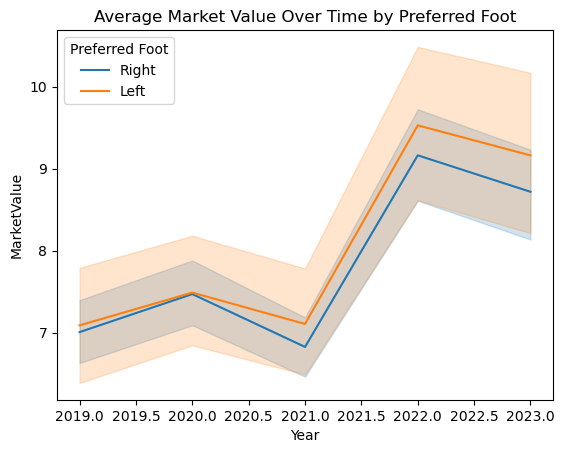

In [24]:
#visual of market value trend by prefered foot


plt.figure()
sns.lineplot(
    data=df_long,
    x="Year",
    y="MarketValue",
    hue="Preferred Foot",
    estimator="mean"
)
plt.title("Average Market Value Over Time by Preferred Foot")
plt.show()


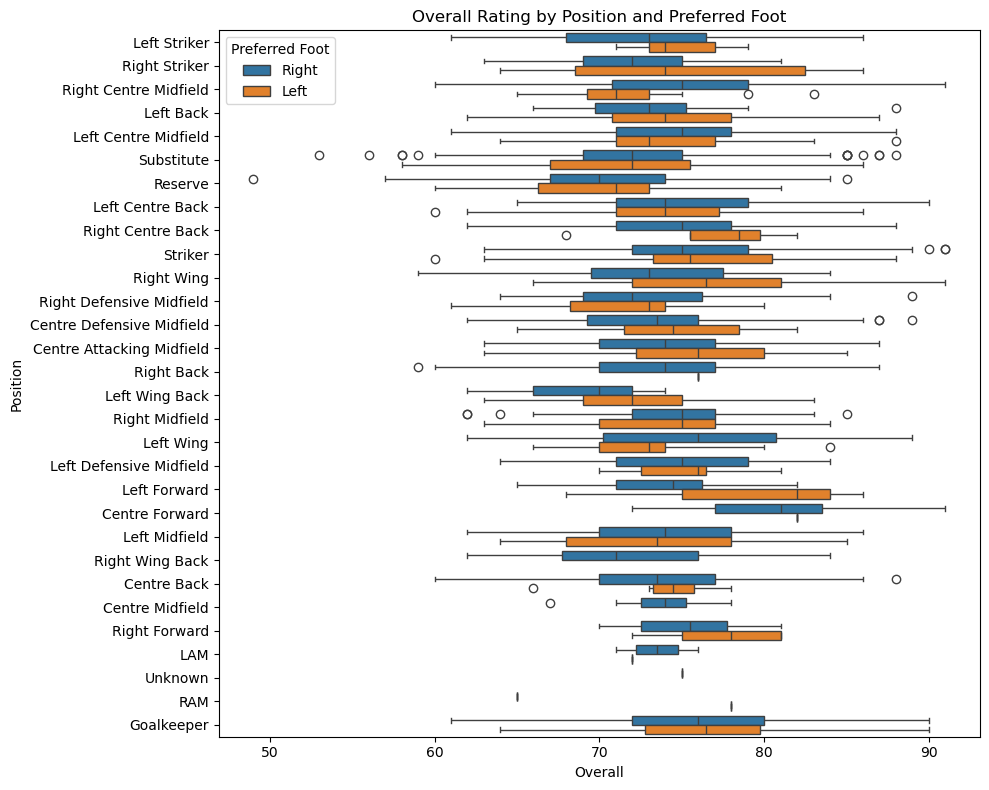

In [28]:
plt.figure(figsize=(10, 8))

sns.boxplot(
    data=fifa_foot_analysis,
    y="Position",
    x="Overall",
    hue="Preferred Foot"
)

plt.title("Overall Rating by Position and Preferred Foot")
plt.tight_layout()
plt.show()
